# Assignment 8

by:<br />Erik Rosvall (960523)

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df1 = pd.read_csv('Poll_Info.csv', sep='\t')
df2 = pd.read_csv('Poll_Report.csv', sep=';')

## Data processing for question 1 and 2

The two first questions are displaed with matplotlib

In [4]:
"""
Getting the 'Correct Answer' from Poll_Info.csv
"""
dd = df1['Correct Answer']
num = []

for i in range(len(dd)):
    num.append(dd[i])
#print(num)

In [5]:
"""
Getting question
"""
ddd = df1['Question']
quest = []

for i in range(len(ddd)):
    quest.append(ddd[i])
#print(quest)

In [6]:
"""
Creating a dictionary for the correct answers
"""
info_dict = {}
info_dict = dict(zip(quest, num))
#print(info_dict)

In [7]:
"""
Getting the question ID
"""
ss = df2['Question ID']
qid = []
for i in range(len(ss)):
    qid.append(ss[i])
#print(qid)
#print(len(qid))

In [8]:
"""
Student answers
"""
sss = df2['Student Answer']
sa = []
for i in range(len(sss)):
    sa.append(sss[i])
#print(sa)
#print(len(sa))

## Question 1
### Analyse how many questions are correctly answered by each student.

In [9]:
# zipping the question id with student answer 
# for q2
s = tuple(zip(qid, sa))


In [10]:
c = 0
cc = []
for key, val in info_dict.items():
    for i in range(len(s)):
        k, v = s[i]
        #print(k,v)
        if key == k and val == v:
            #print(k,v)
            #print(key, val)
            c +=1
    cc.append(c)
    c = 0

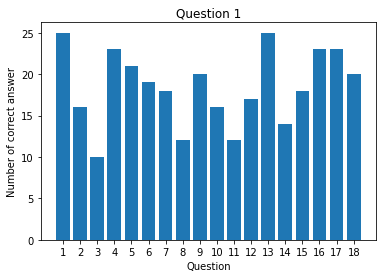

In [11]:

plt.bar(quest, cc)
plt.xticks(quest)
plt.title('Question 1')
plt.xlabel('Question')
plt.ylabel('Number of correct answer')
plt.show()

## Question 2
### Analyse how many students answered correctly for each question

In [12]:
"""
Get student names
"""
student_names = df2['User Name']
sqid = df2['Question ID']
san = tuple(zip(sqid, student_names, sa))
#print(len(student_names))
#print(san)
#print(len(san))

In [13]:
snam = []
for i in range(len(student_names)):
    if student_names[i] not in snam:
        snam.append(student_names[i])
#print(snam)

In [14]:
score = []
c = 0

for i in range(len(snam)):
    for key, val in info_dict.items():
        for j in range(len(san)):
            ii, n, a = san[j]
            if snam[i] == n:
                if ii == key and a == val:
                    c += 1
    score.append(c)
    c = 0
#print(score)

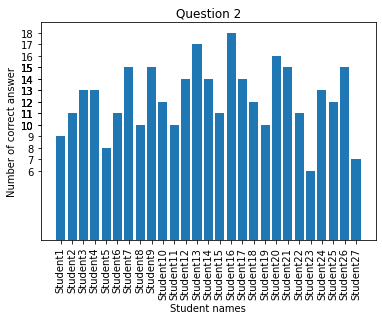

In [15]:
plt.bar(snam, score)
plt.xticks(snam)
plt.xticks(rotation=90)
plt.yticks(score)
plt.title('Question 2')
plt.xlabel('Student names')
plt.ylabel('Number of correct answer')
plt.show()

## Question 3

This are displayed with seaborn

This block below takes the two CSV-files and concatenats them.<br />This makes it easier to display the rest of the questions

In [33]:
"""
This block can be used to get all the data for every question.
"""

# sticth (merge) the two csv-files together
# df1 and df2 are from the import form the beginning
df_stitch = pd.merge(df1, df2, left_on='Question', right_on='Question ID')
df_stitch.drop('Question ID', axis=1, inplace = True)

# Getting the data 
df_stitch['date_time_launched']=pd.to_datetime(df_stitch['Time Launched']).dt.time
df_stitch['date_submitted_time']=pd.to_datetime(df_stitch['Submitted Date/Time']).dt.time
df_stitch.drop(['Time Launched','Submitted Date/Time'],axis=1,inplace=True)

# Getting timedata
df_stitch['seconds_for_answering']= (pd.to_timedelta(df_stitch['date_submitted_time'].astype(str)) - 
                             pd.to_timedelta(df_stitch['date_time_launched'].astype(str))).dt.total_seconds()

# dropping data
df_stitch.drop(['date_time_launched','date_submitted_time'],axis=1,inplace=True)

# Checiking the answers and see if they are true
df_stitch['answer_is_true'] = np.where(df_stitch['Correct Answer']==df_stitch['Student Answer'],1,0)
df_stitch['answer_is_true'] = df_stitch['answer_is_true'].astype('object')

# rename column
df_stitch.rename(columns={'User Name':'s_numb'}, inplace=True)
merge_df = df_stitch.groupby(['s_numb','User Email']).agg({'answer_is_true':'sum'}).sort_values(by='answer_is_true', ascending=True)



### a) 
For each student, which question(s) took the longest time for that student

In [38]:
dfpivtime =df_stitch.pivot(index='Question', columns='s_numb', values=['seconds_for_answering'])
dfpivtime

seconds_for_answering                                          \
s_numb                Student1 Student10 Student11 Student12 Student13   
Question                                                                 
1                         32.0      28.0      31.0      46.0      29.0   
2                         88.0      35.0      64.0      74.0      50.0   
3                        117.0      23.0     117.0      75.0       8.0   
4                         26.0      29.0      69.0      39.0      39.0   
5                         92.0      46.0      97.0      39.0      33.0   
6                         29.0      36.0      33.0      32.0      32.0   
7                         34.0      85.0      54.0      39.0     100.0   
8                         60.0      68.0     123.0      45.0      88.0   
9                        109.0     119.0      90.0      53.0      83.0   
10                       110.0      99.0     171.0      43.0      80.0   
11                       153.0     136.0     153.0      57.0      45.0   
12                        75.0     107.0     138.0      86.0     102.0   
13                       120.0      60.0      31.0     124.0      73.0   
14                        64.0      68.0      61.0      53.0      89.0   
15                       117.0      77.0     161.0     151.0     215.0   
16                        89.0      26.0      68.0      90.0      99.0   
17                        67.0      79.0      45.0     146.0      31.0   
18                       281.0      41.0     336.0      32.0     106.0   

                                                            ...            \
s_numb   Student14 Student15 Student16 Student17 Student18  ... Student25   
Question                                                    ...             
1             26.0      37.0      33.0      25.0      30.0  ...      26.0   
2             21.0      91.0      31.0      51.0      36.0  ...      42.0   
3             50.0      64.0      17.0      61.0      24.0  ...      47.0   
4             58.0      58.0      21.0      88.0      28.0  ...      59.0   
5             27.0      89.0      30.0      42.0      49.0  ...      58.0   
6             29.0      66.0      31.0      41.0      42.0  ...      65.0   
7             39.0      92.0      55.0      67.0      77.0  ...      90.0   
8             39.0     102.0      59.0     118.0      74.0  ...     102.0   
9             63.0     113.0      35.0     149.0      78.0  ...     114.0   
10            28.0      74.0      38.0     160.0     128.0  ...     114.0   
11            53.0     104.0      28.0     116.0      67.0  ...     144.0   
12            34.0     111.0      40.0      42.0     136.0  ...     129.0   
13            41.0      93.0      72.0      74.0      83.0  ...     116.0   
14            31.0      79.0      42.0     102.0      92.0  ...      66.0   
15            53.0      89.0      45.0     111.0      98.0  ...      61.0   
16            23.0     126.0      33.0     125.0      31.0  ...     110.0   
17            57.0      46.0      36.0      36.0      80.0  ...     108.0   
18            18.0     379.0      45.0     232.0      40.0  ...     365.0   

                                                                           \
s_numb   Student26 Student27 Student3 Student4 Student5 Student6 Student7   
Question                                                                    
1             26.0      38.0     31.0     29.0     30.0     33.0     26.0   
2             56.0      57.0     61.0     27.0     53.0     36.0     38.0   
3             59.0      29.0     37.0     24.0     55.0     80.0     16.0   
4             43.0      57.0     96.0     59.0     61.0     49.0     34.0   
5             33.0      79.0     35.0     62.0     28.0     71.0     30.0   
6             32.0      60.0     32.0     36.0     32.0     34.0     29.0   
7             48.0      90.0     44.0     94.0     49.0     77.0     58.0   
8             72.0     100.0    100.0     57.0     56.0    105.0  

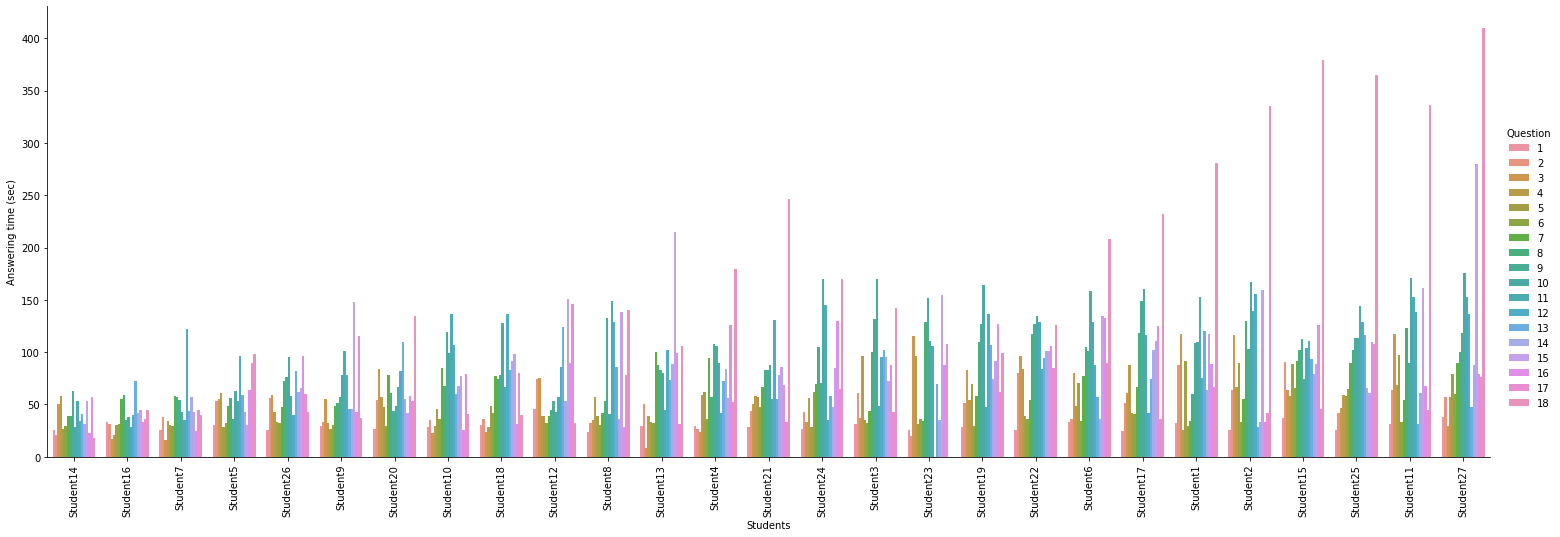

In [17]:
plot_order = df_stitch.groupby('s_numb')['seconds_for_answering'].mean().sort_values(ascending=True).index.values

ax = sns.catplot(data=df_stitch, x='s_numb',  y='seconds_for_answering',kind='bar',hue="Question",ci=None,
            order=plot_order,height=7,aspect=3)

ax.set(xlabel='Students', ylabel='Answering time (sec)')

plt.xticks(rotation=90)
plt.show()

### b) 
Which question(s) took the longest time to answer among all student

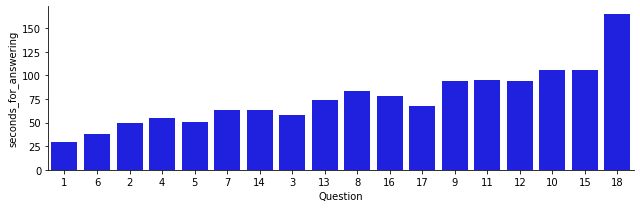

In [18]:
plot_order = df_stitch.groupby('Question')['seconds_for_answering'].max().sort_values(ascending=True).index.values

sns.catplot(data=df_stitch, x='Question',  y='seconds_for_answering',kind='bar',ci=None,
            order=plot_order,height=3,aspect=3, color = 'Blue')

plt.show()

### c) 
Which question(s) had the longest average response time

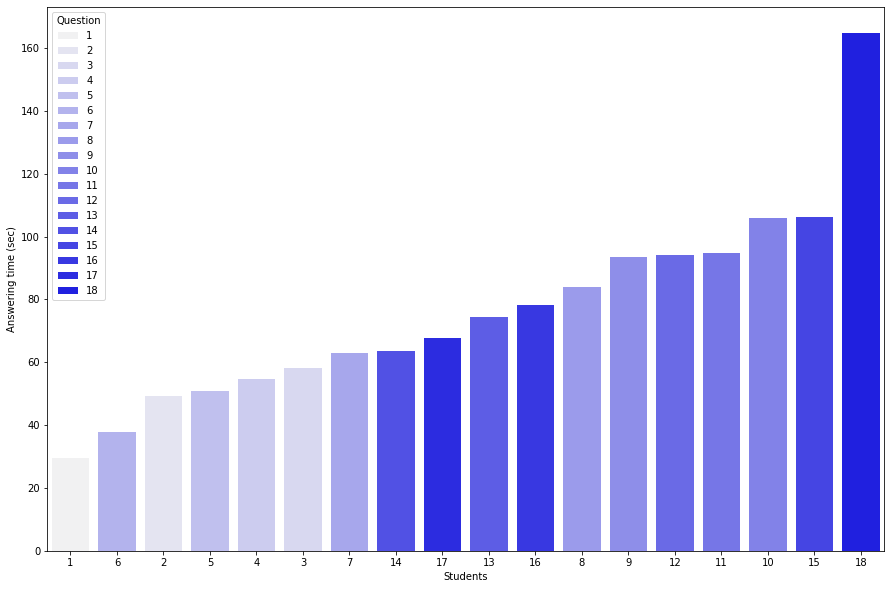

In [19]:
plot_order = df_stitch.groupby('Question')['seconds_for_answering'].mean().sort_values(ascending=True).index.values
plt.figure(figsize=(15,10))

az = sns.barplot(data=df_stitch, x='Question',  y='seconds_for_answering',hue="Question",ci=None,
            order=plot_order,dodge=False, color = 'Blue')
az.set(xlabel='Question', ylabel='Answering time (sec)')

plt.show();

## Question 4
### Investigate whether students who took a longer time to answer perform well or not

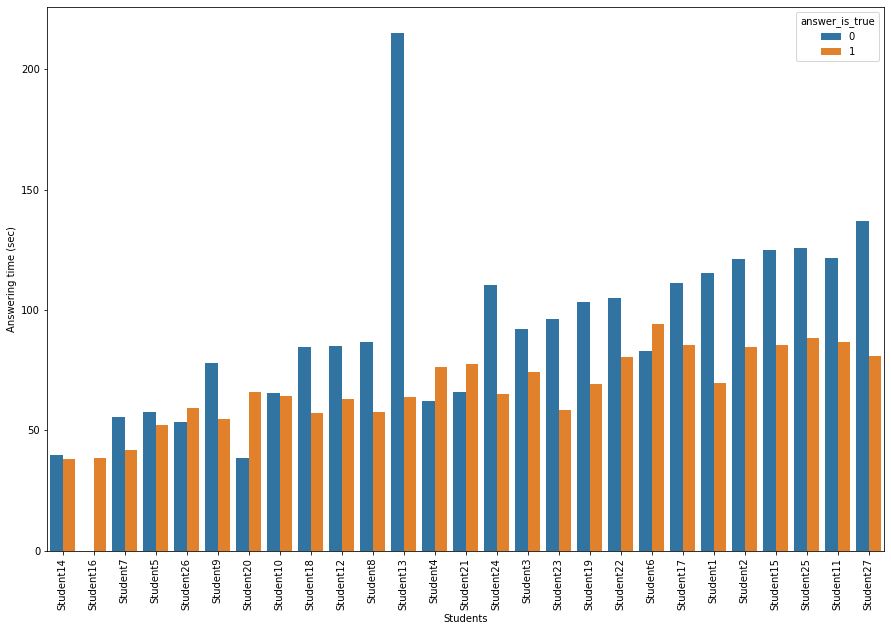

In [20]:
plot_order = df_stitch.groupby('s_numb')['seconds_for_answering'].mean().sort_values(ascending=True).index.values
plt.figure(figsize=(15,10))

ay = sns.barplot(data=df_stitch, x='s_numb',  y='seconds_for_answering',hue="answer_is_true",ci=None,
            order=plot_order,dodge=True)
ay.set(xlabel='Students', ylabel='Answering time (sec)')

plt.xticks(rotation=90)
plt.show()

## Question 5
### Find all pairs of students who gave the same wrong answers for at least two questions

In [21]:
dsw = df_stitch[df_stitch["answer_is_true"]==0]

In [39]:
dfpiv=dsw.pivot(index='s_numb', columns='Question', values=['Student Answer'])
dfpiv=dfpiv.fillna(0)
dfpiv

Student Answer                                                   
Question              1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18
s_numb                                                                     
Student1               0  D  A  0  0  0  0  C  0  A  B  C  0  A  0  A  0  B
Student10              0  A  0  0  A  0  0  C  0  B  0  0  0  A  C  0  0  0
Student11              0  0  C  0  A  0  0  C  D  A  B  0  0  A  C  0  0  0
Student12              0  C  D  0  0  0  0  C  0  0  0  0  0  0  0  0  C  0
Student13              0  0  0  0  0  0  0  0  0  0  0  0  0  0  D  0  0  0
Student14              0  0  D  0  0  0  B  C  0  0  0  0  0  A  0  0  0  0
Student15              0  D  D  0  0  B  A  0  0  0  B  0  0  A  0  0  0  C
Student17              0  0  0  0  0  0  0  B  0  A  0  A  0  0  0  B  0  0
Student18              0  0  0  0  A  0  0  C  0  B  B  0  0  A  C  0  0  0
Student19              0  A  0  0  0  0  0  B  D  A  C  C  0  0  0  A  D  0
Student2               0  0  C  0  0  0  0  B  D  A  E  0  0  A  C  0  0  0
Student20              0  0  0  0  A  D  0  0  0  0  0  0  0  0  0  0  0  0
Student21              0  0  0  0  0  D  B  C  0  0  0  0  0  0  0  0  0  0
Student22              0  A  D  B  0  0  0  A  D  0  B  0  0  A  0  0  0  0
Student23              0  0  D  B  0  D  0  E  0  A  B  0  A  A  C  0  E  0
Student24              0  0  0  0  0  D  B  C  0  C  E  0  0  0  0  0  0  0
Student25              0  D  D  0  0  0  A  0  0  0  B  0  0  A  0  0  0  C
Student26              0  0  0  0  0  0  0  0  0  0  B  A  0  A  0  0  0  0
Student27              B  D  D  0  A  C  D  0  0  B  B  A  0  0  D  0  0  B
Student3               0  0  D  B  0  0  0  C  C  0  0  0  0  A  0  0  0  0
Student4               0  A  D  B  0  0  B  0  D  0  0  0  0  0  0  0  0  0
Student5               0  D  C  0  A  0  D  C  0  0  E  C  A  0  C  0  0  B
Student6               B  0  A  0  0  D  B  0  0  0  0  0  0  0  C  A  A  0
Student7               0  0  D  0  0  D  0  0  0  0  0  E  0  0  0  0  0  0
Student8               0  C  C  0  0  0  0  0  C  A  B  A  0  A  0  0  0  B
Student9               0  0  D  0  0  0  0  0  0  0  B  E  0  0  0  0  0  0

In [23]:
pairs = []
for s, r in dfpiv.iterrows(): # loop for first student
    cs = []
    for q in r['Student Answer']:
        cs.append(q)
    for ss, rr in dfpiv.iterrows(): # loop for next student
        cq = []
        p = []
        co = 0
        if s != ss:
            for qq in rr['Student Answer']: # loop over sudentanswer for rr
                cq.append(qq)
            for alpha, beta in zip(cs, cq):
                if s != ss and alpha != 0 and beta != 0:
                    if alpha == beta:
                        co += 1
            if co >= 2:
                p.append(s)
                p.append(ss)
        if len(p) == 2 and p not in pairs:
            pairs.append(p)
print(len(pairs))
#print(pairs)

226


In [24]:
nn = []
for word in pairs:
    a,b = word
    temp = a+' '+b
    nn.append(temp)
#print(nn)

**Own assumption** <br />
Due to non of the normal ways worked to remove the duplicates. I choose to make a hardcoded devide by 2, to show that i am aware of the duplicates, and also because non of the standard "remove duplicates" worked for me.
<br />
<br />
> *I did check all of them by hand*

In [25]:
int(len(nn)/2)

113

## Question 6
### Are there more interesting information one can derive from studying how long each student response to each question that might be of interest to the teacher?

There are some thoughts that the teacher can take to consideration from the analysis done.

- To begin, the average time spent on the different task were between 1 - 2 minutes. This will help the teache to plan for upcomming exams in the futeure. 
- Of all questions, everyone took the longest time to solve problem 18. Some top peek times were good 5+ minutes. By knowing this, the teacher my add some points to this type och question and maybe reduce some points to questione who didn't take as long.
- There could also be some help to know the time for all questions, this to help the teacher to plan the next exam and if needed, change the  time according to the average time for all questions.
- This could also tell the teacher what to expect for the comming years and what might be difficult for comming students and where extra time need to be putted.
- in the graph from question 4, you can see that most of the students have an approximate 50/50 true and false answer (no high correlation). 
- From the graph in Question 1, we can see where the majority students have their knowledge and where some of them lack. This could help for future teaching.

## Resources
- https://seaborn.pydata.org/
- https://matplotlib.org/
- Python Data Science Handbook - Essential tools for working with data (Jake VanderPlas)
- https://pandas.pydata.org/docs/